In [1]:
import numpy as np
import pandas as pd

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
import matplotlib.pyplot as plt
# plt.style.use("fivethirtyeight")
# plt.rcParams()
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import datetime as dt
from scipy import stats
from pandas.plotting import table

import plotly as py
import plotly.express as px
import plotly.graph_objects as go
import os
py.offline.init_notebook_mode(connected=True)

In [5]:
df_nifty50 = pd.read_csv("/NIFTY 50_Data.csv")
df_nifty50.head()

,Date,Open,High,Low,Close
0,09 Sep 2022,17923.35,17925.95,17786.00,17833.35
1,08 Sep 2022,17748.15,17807.65,17691.95,17798.75
2,07 Sep 2022,17519.40,17650.75,17484.30,17624.40
3,06 Sep 2022,17695.70,17764.65,17587.65,17655.60
4,05 Sep 2022,17546.45,17683.15,17540.35,17665.80


In [6]:
df_nifty50.shape

(5645, 5)

In [7]:
df_nifty50.tail()

,Date,Open,High,Low,Close
5640,07 Jan 2000,1616.60,1628.25,1597.20,1613.3
5641,06 Jan 2000,1595.80,1639.00,1595.80,1617.6
5642,05 Jan 2000,1634.55,1635.50,1555.05,1595.8
5643,04 Jan 2000,1594.40,1641.95,1594.40,1638.7
5644,03 Jan 2000,1482.15,1592.90,1482.15,1592.2


In [8]:
df_nifty50.describe(include='all')

,Date,Open,High,Low,Close
count,5645,5645.000000,5645.000000,5645.000000,5645.000000
unique,5645,NaN,NaN,NaN,NaN
top,09 Sep 2022,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,6228.512710,6268.448273,6179.771887,6225.147609
std,NaN,4377.243828,4393.167709,4351.226639,4373.145041
min,NaN,853.000000,877.000000,849.950000,854.200000
25%,NaN,2352.650000,2368.050000,2320.050000,2353.600000
50%,NaN,5369.550000,5409.100000,5325.200000,5366.000000
75%,NaN,8774.550000,8809.550000,8715.100000,8756.500000


In [9]:
df_nifty50.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5645 entries, 0 to 5644
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5645 non-null   object 
 1   Open    5645 non-null   float64
 2   High    5645 non-null   float64
 3   Low     5645 non-null   float64
 4   Close   5645 non-null   float64
dtypes: float64(4), object(1)
memory usage: 220.6+ KB


In [10]:
df_nifty50['Date'] = pd.to_datetime(df_nifty50['Date'])
df_nifty50.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [11]:
df_nifty50.fillna(0, inplace=True)

In [12]:
df_nifty50.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

array([[<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
        <Axes: xlabel='Date'>],
       [<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
        <Axes: xlabel='Date'>],
       [<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
        <Axes: xlabel='Date'>]], dtype=object)

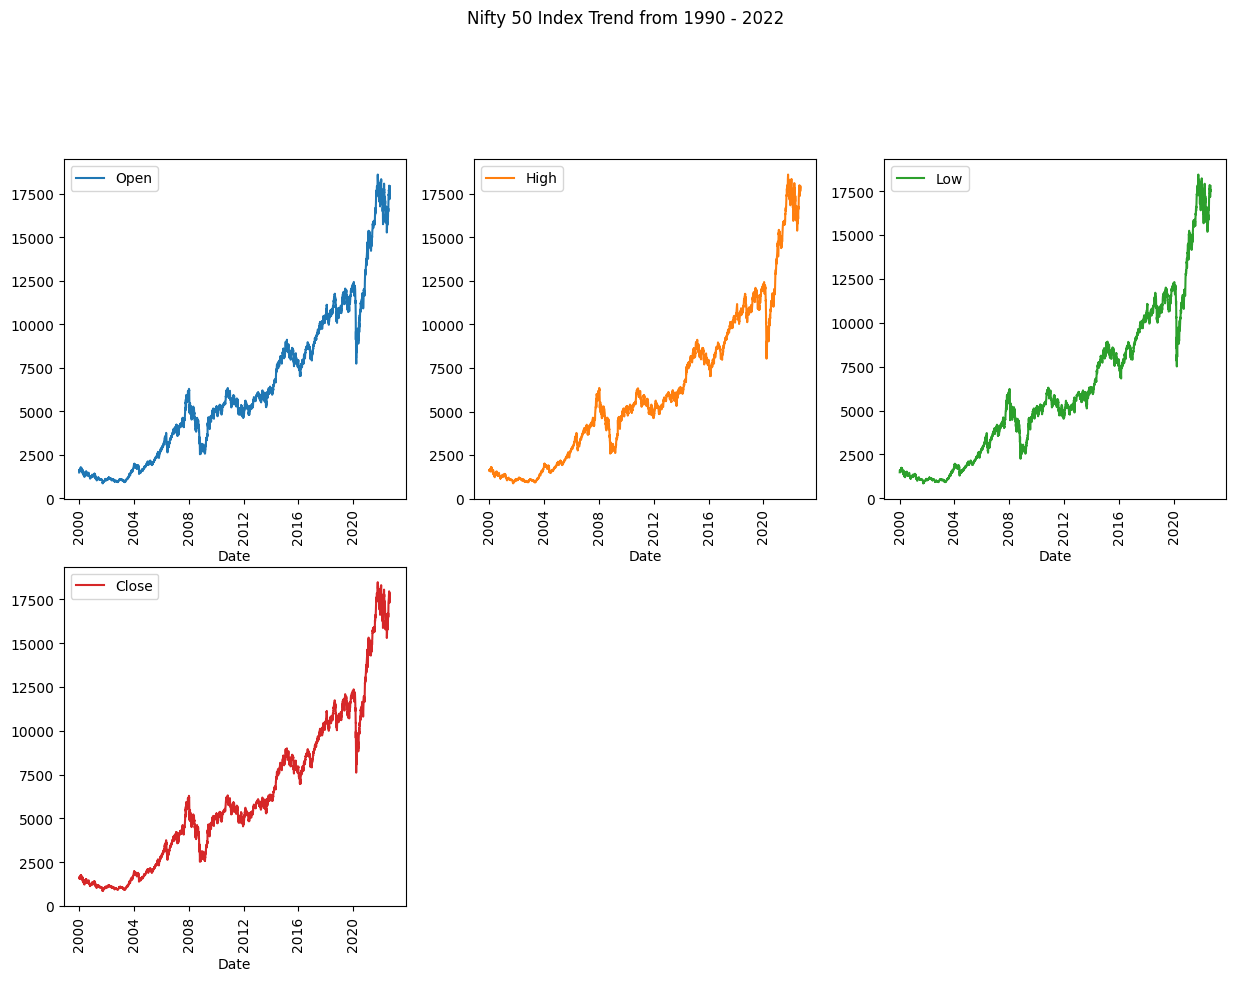

In [14]:
# df_nifty50.set_index("Date", inplace=True)
column_list = ['Open', 'High', 'Low', 'Close']

df_nifty50.plot(x="Date", y=column_list, subplots=True, layout=(3,3), figsize=(15,15),
                sharex=False, title='Nifty 50 Index Trend from 1990 - 2022', rot=90)

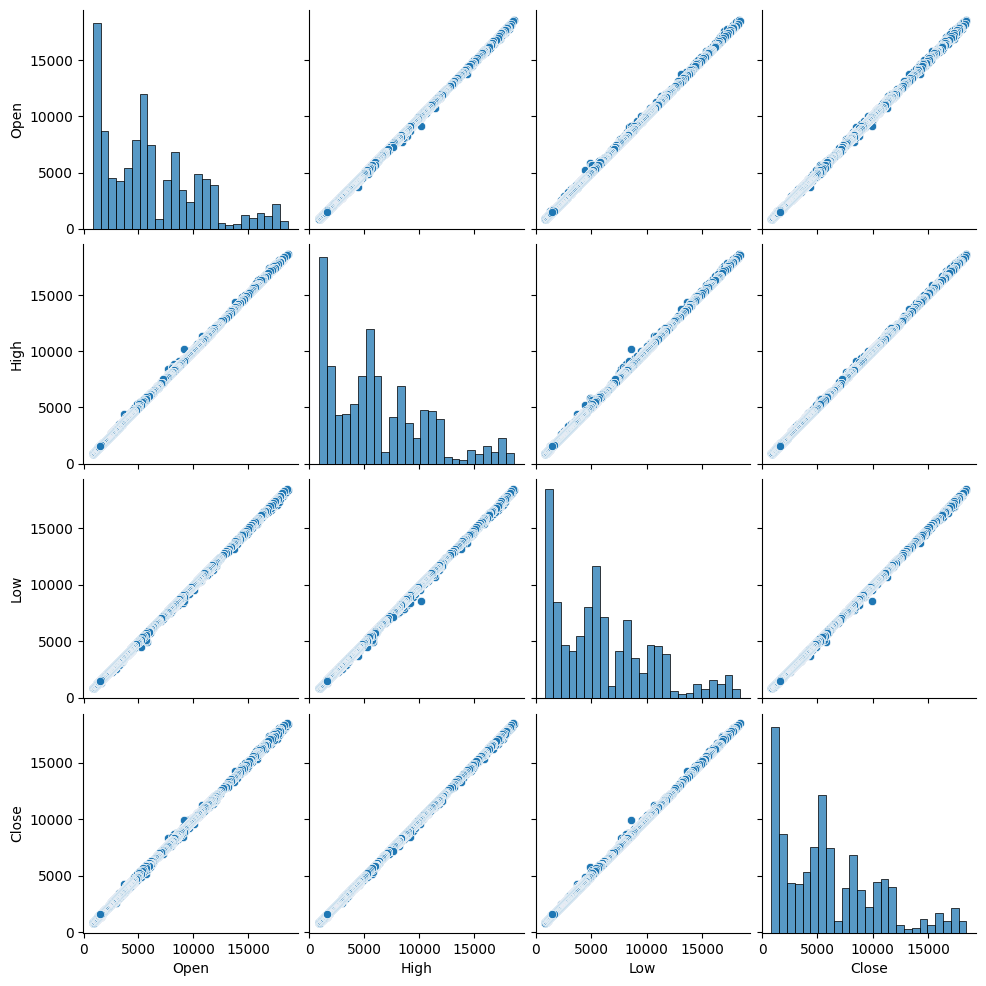

In [15]:
sns.pairplot(df_nifty50)

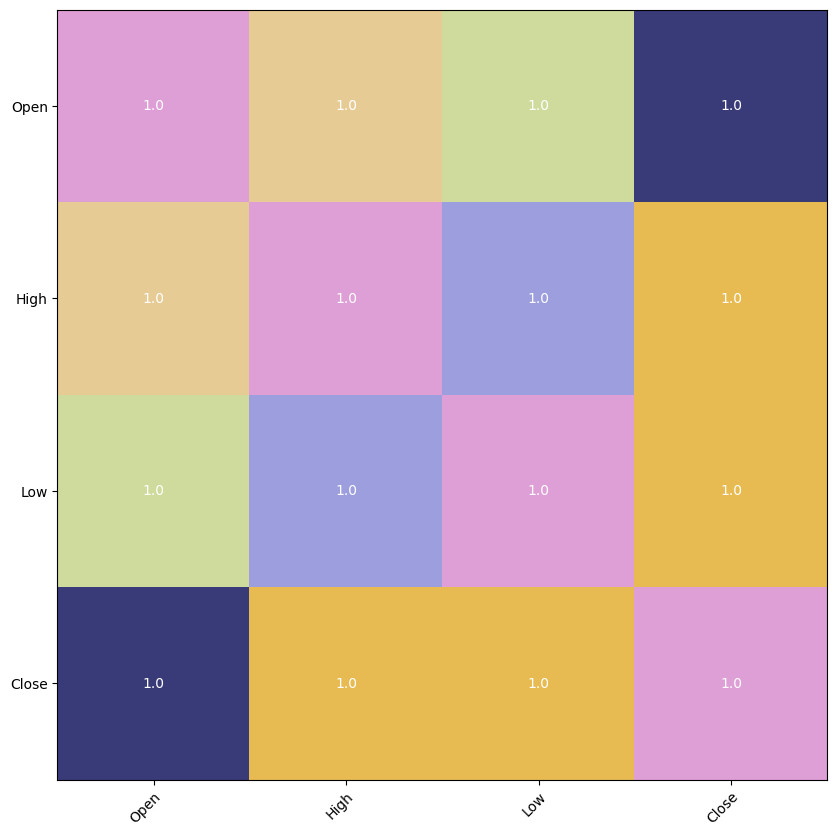

In [16]:
#get correlation matrix
corr = df_nifty50.corr()
fig, ax = plt.subplots(figsize = (10, 10))

#create a heatmap
# plt.figure(figsize=(20,20))
im = ax.imshow(corr.values,cmap="tab20b")

#set labels
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.columns)))
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)

#Rotating xticklabels
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
#loop over data dimensions and create text annotations.
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        text = ax.text(j,i,np.around(corr.iloc[i,j],decimals=2), ha="center", va="center", color="white")

# sns.heatmap(df_nifty50.corr())

In [17]:
#Correlation Matrix
corr

,Open,High,Low,Close
Open,1.000000,0.999938,0.999911,0.999857
High,0.999938,1.000000,0.999884,0.999932
Low,0.999911,0.999884,1.000000,0.999929
Close,0.999857,0.999932,0.999929,1.000000


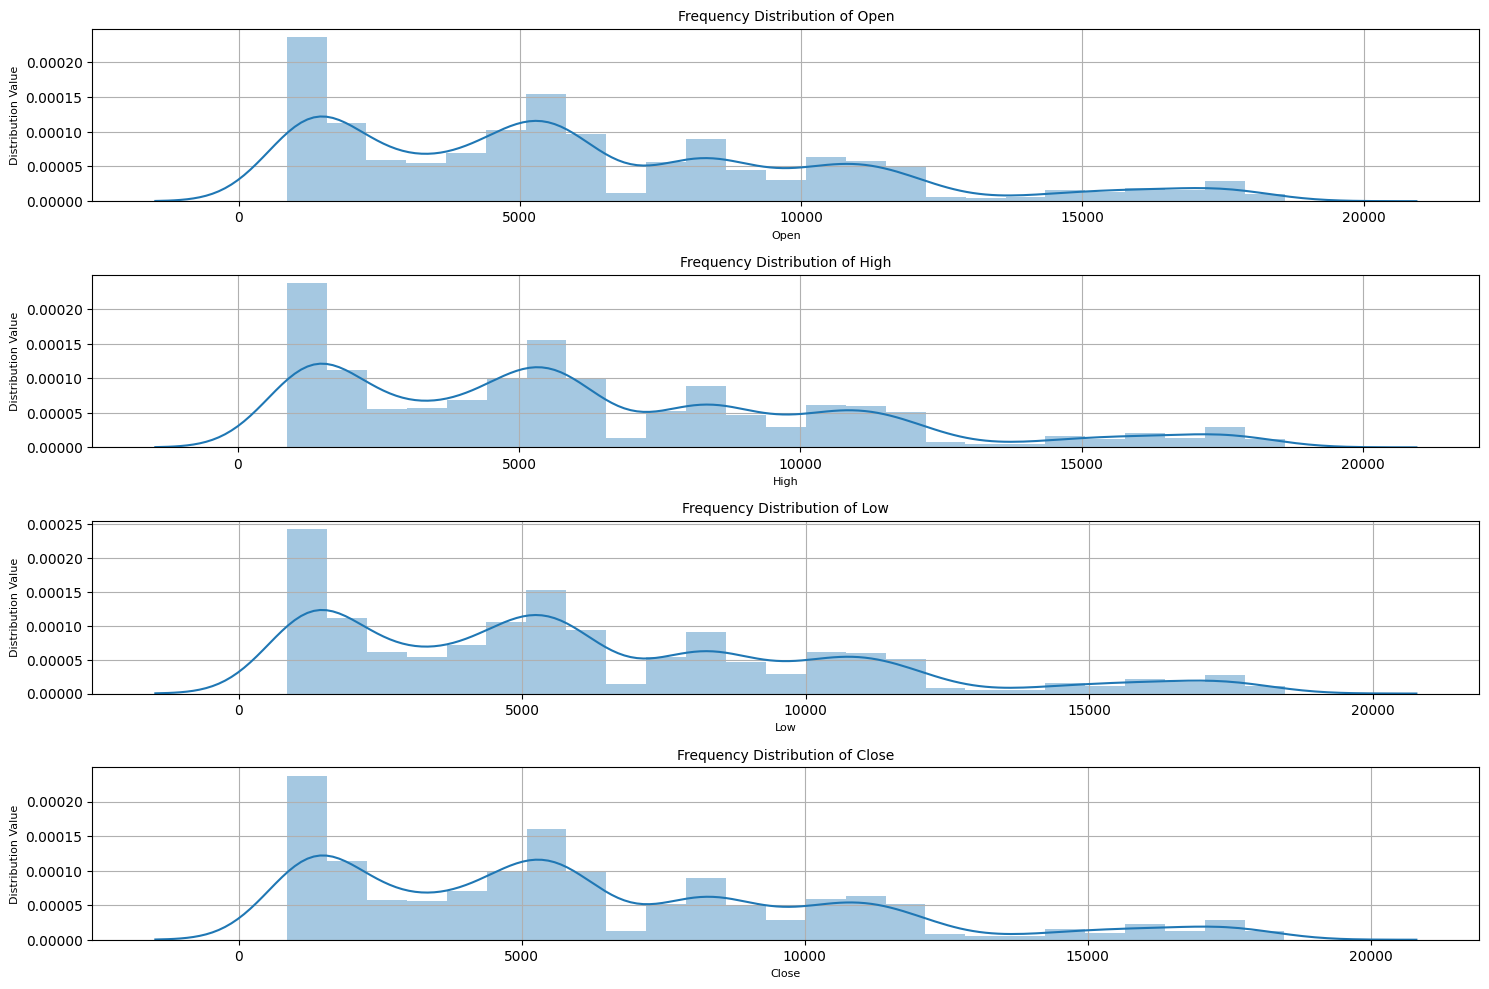

In [18]:
# Visualize the spread and skweness through the distribution plot

# Use the Column_List : list initialized above in the following steps
fig, ax = plt.subplots(len(column_list), figsize = (15, 10))

for i, col_list in enumerate(column_list):
    sns.distplot(df_nifty50[col_list], hist = True, ax = ax[i])
    ax[i].set_title ("Frequency Distribution of" + " " + col_list, fontsize = 10)
    ax[i].set_xlabel (col_list, fontsize = 8)
    ax[i].set_ylabel ('Distribution Value', fontsize = 8)
    fig.tight_layout (pad = 1.1) # To provide space between plots
    ax[i].grid('on') # Enabled to view and make markings

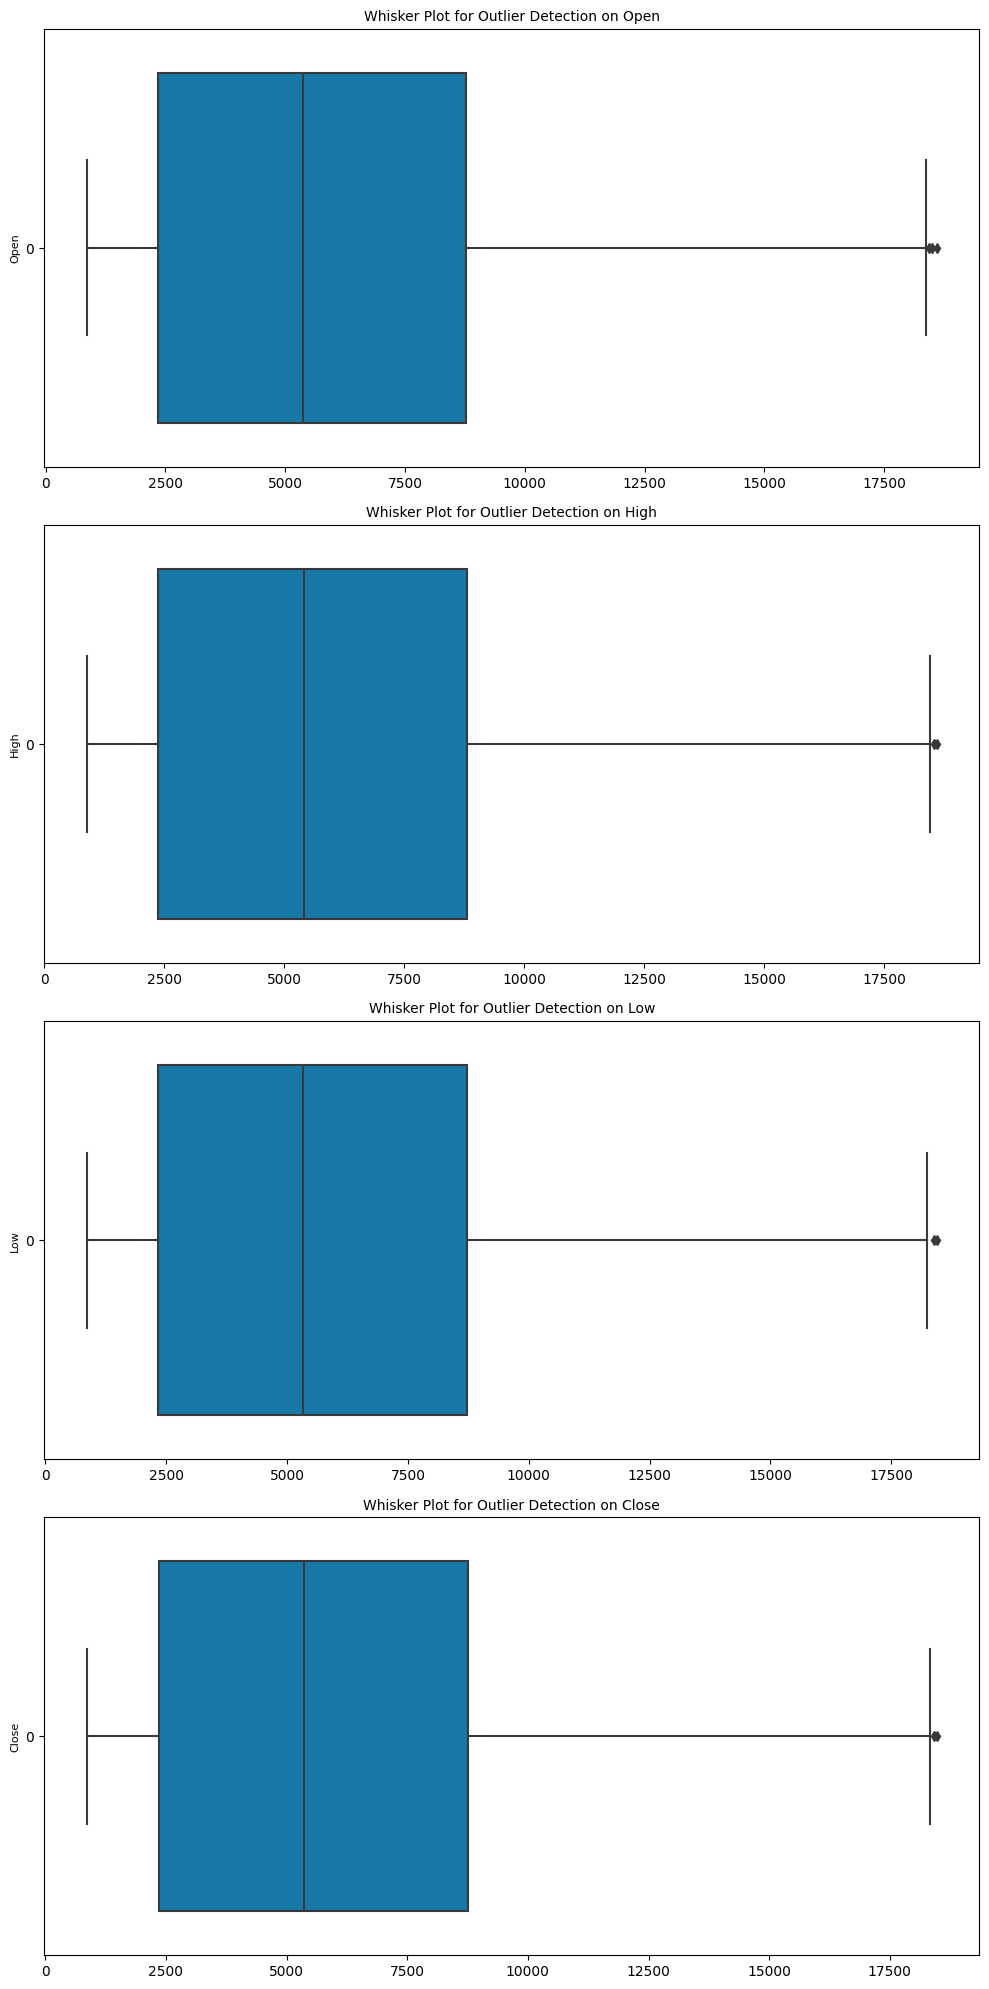

In [19]:
# Generate whisker plots to detect the presence of any outliers
fig, ax = plt.subplots (len(column_list), figsize = (10, 20))

for i, col_list in enumerate(column_list):
    sns.boxplot(df_nifty50[col_list], ax = ax[i], palette = "winter", orient = 'h')
    ax[i].set_title("Whisker Plot for Outlier Detection on" + " " + col_list, fontsize = 10)
    ax[i].set_ylabel(col_list, fontsize = 8)
    fig.tight_layout(pad = 1.1)

In [20]:
# It is evident from the whisker plots that there are some outliers in all the variables

# Remove the variables either using IQR technique or Z-Score
Descriptive_Statistics = df_nifty50.describe()
Descriptive_Statistics = Descriptive_Statistics.T # Transpose the data

# Extract the IQR values
Descriptive_Statistics['IQR'] = Descriptive_Statistics['75%'] - Descriptive_Statistics['25%']

# In this scenario, the outliers are removed using Z-Score due to the variability in historical data
df_nifty50 = df_nifty50[(np.abs(stats.zscore(df_nifty50[['Open', 'High', 'Low', 'Close']])) < 3).all(axis = 1)] # abs for (+/-) 3-sigma
Data = df_nifty50.reset_index() # Due to elimination of rows, index has to be reset
#Now compare the new dimension with the old one (The one mentioned during the reading of the file)
Data # 7751 * 6

,index,Date,Open,High,Low,Close
0,0,2022-09-09,17923.35,17925.95,17786.00,17833.35
1,1,2022-09-08,17748.15,17807.65,17691.95,17798.75
2,2,2022-09-07,17519.40,17650.75,17484.30,17624.40
3,3,2022-09-06,17695.70,17764.65,17587.65,17655.60
4,4,2022-09-05,17546.45,17683.15,17540.35,17665.80
...,...,...,...,...,...,...
5640,5640,2000-01-07,1616.60,1628.25,1597.20,1613.30
5641,5641,2000-01-06,1595.80,1639.00,1595.80,1617.60
5642,5642,2000-01-05,1634.55,1635.50,1555.05,1595.80
5643,5643,2000-01-04,1594.40,1641.95,1594.40,1638.70


In [21]:
Data.shape

(5645, 6)

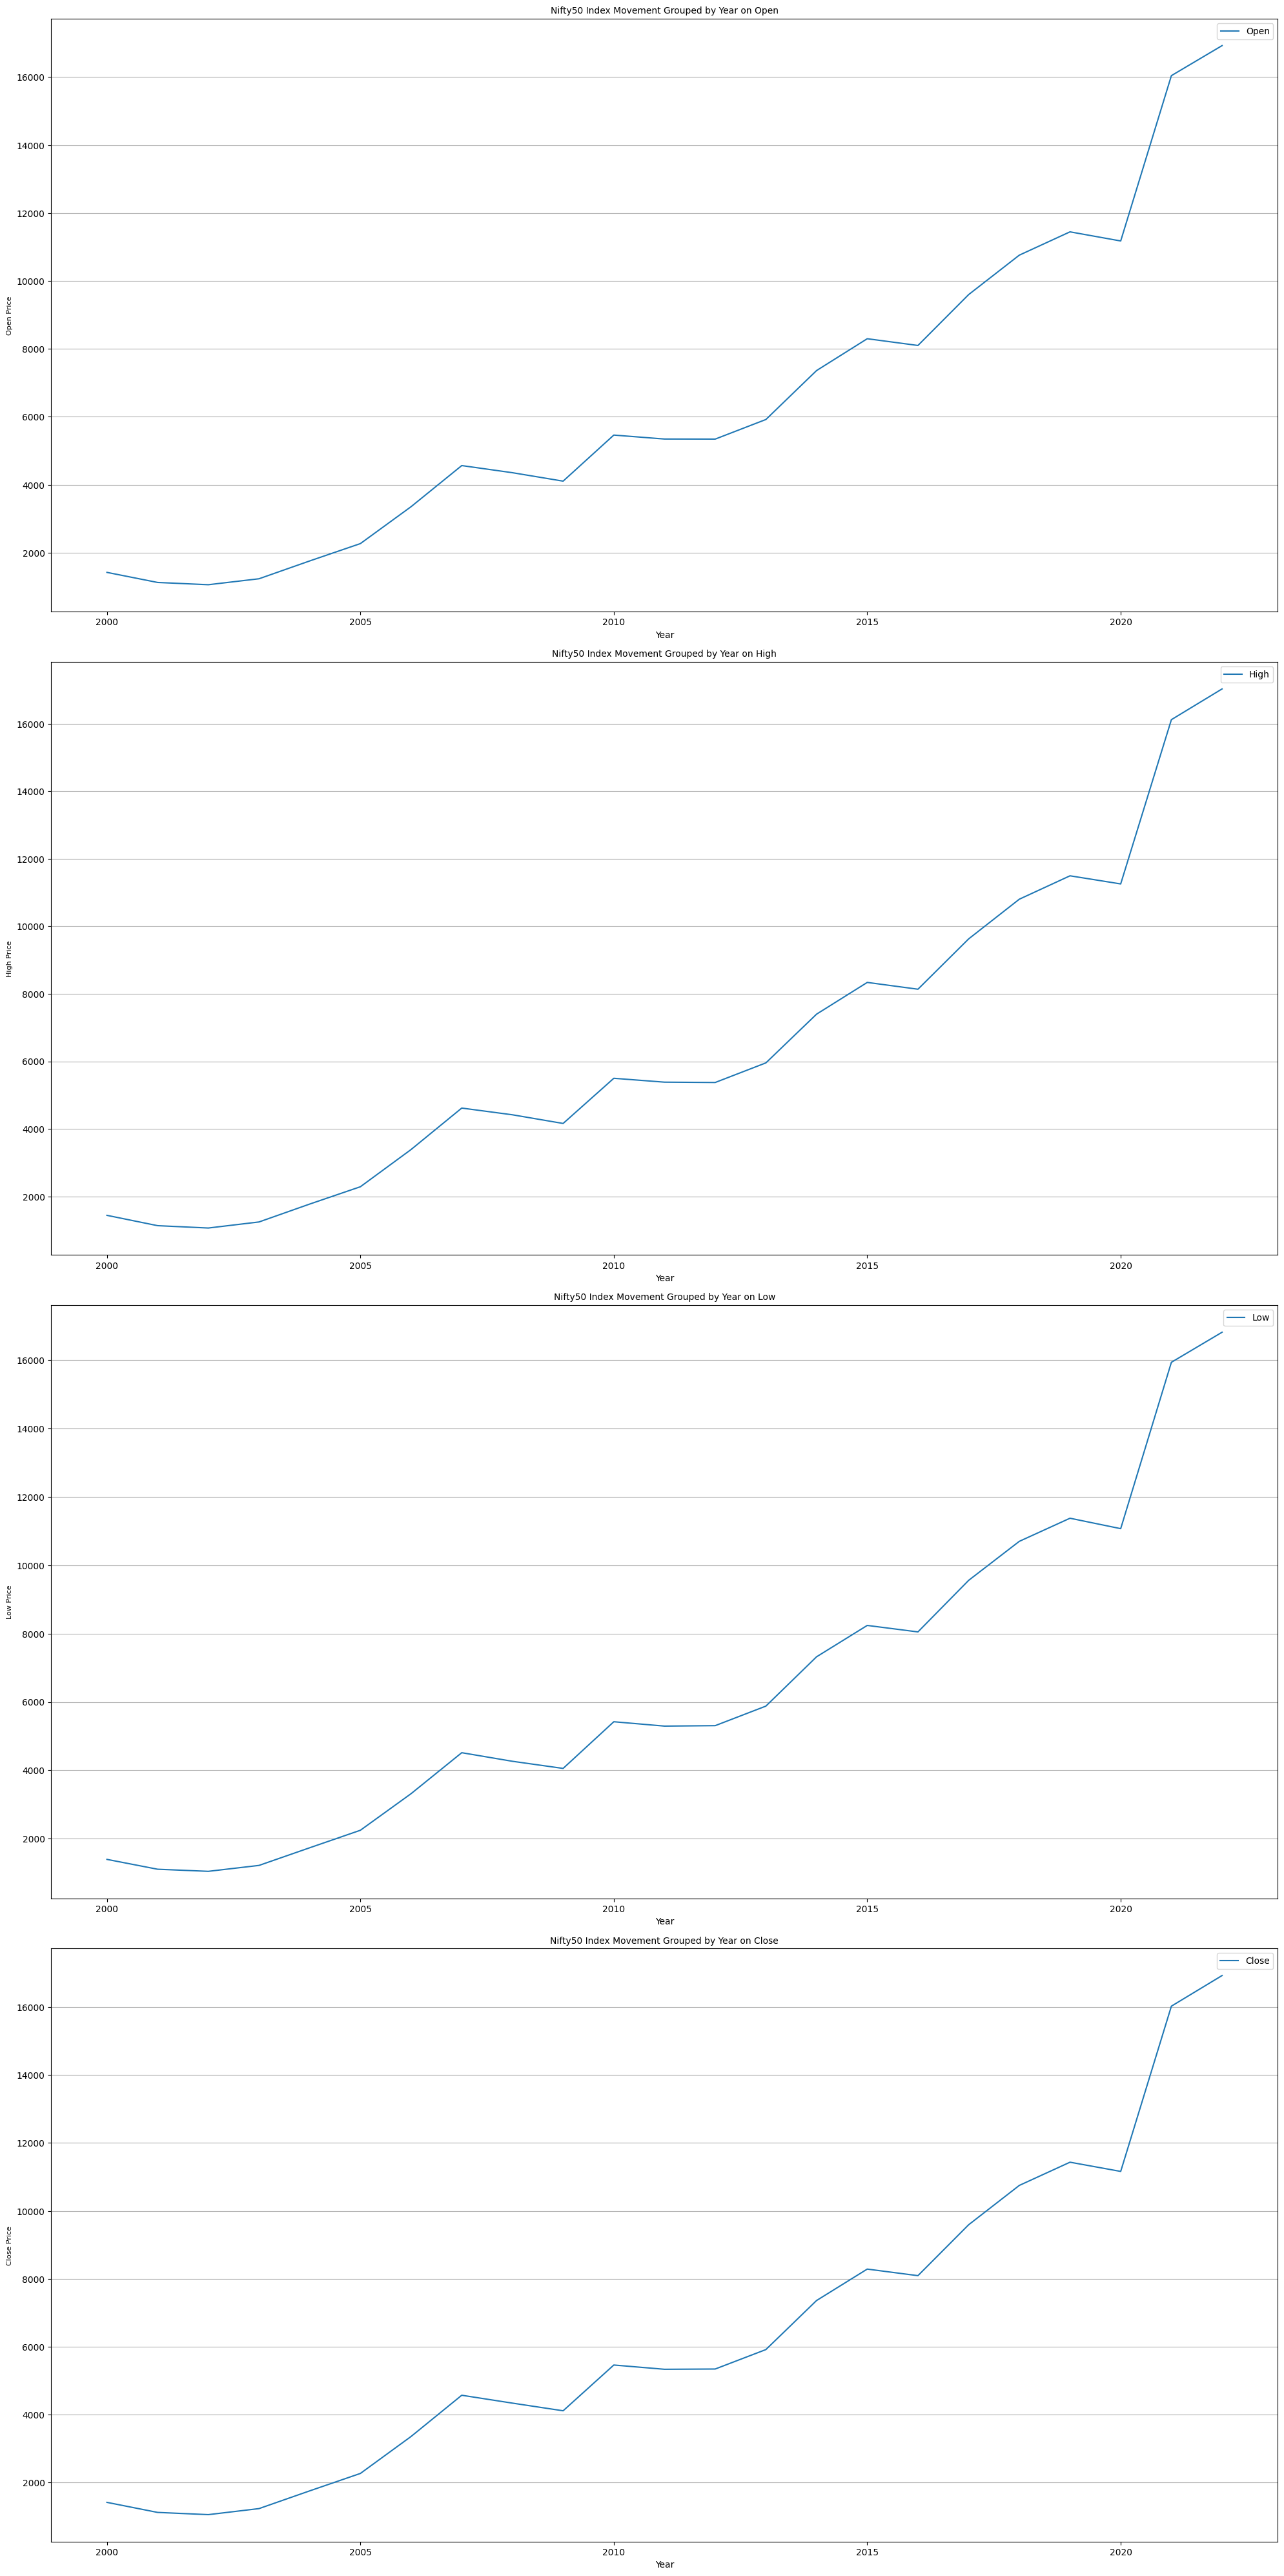

In [23]:
# Decompose the time series year-wise and month-wise to analyse further
Data['Year'] = Data['Date'].dt.year
Data['Month'] = Data['Date'].dt.month
Data['WeekDay'] = Data['Date'].dt.weekday
Data.sort_values(by=['Date'], ascending=True, inplace=True)

# Firstly, plot the data year-wise to see the duration of when it hiked and dipped
fig, ax = plt.subplots(len(column_list), figsize = (20, 40))

# Group the data by year and plot
for i, col_list in enumerate(column_list):
    Data.groupby('Year')[col_list].mean().plot(ax = ax[i], legend = True)
    ax[i].set_title("Nifty50 Index Movement Grouped by Year on" + " " + col_list, fontsize = 10)
    ax[i].set_ylabel(col_list + " " + "Price", fontsize = 8)
    fig.tight_layout(pad = 1.1)
    ax[i].yaxis.grid(True) # To enable grid only on the Y-axis

In [24]:
df_N50H = pd.read_csv('/NIFTY 50 - HistoricalPE_PBDIV_Data.csv')
df_N50H.head()

,Date,P/E,P/B,Div Yield %
0,12 Aug 2022,21.18,4.15,1.35
1,11 Aug 2022,21.29,4.18,1.36
2,10 Aug 2022,21.11,4.21,1.34
3,08 Aug 2022,21.02,4.21,1.33
4,05 Aug 2022,20.86,4.18,1.29


In [25]:
df_N50H.tail()

,Date,P/E,P/B,Div Yield %
5872,07 Jan 1999,12.46,2.22,1.71
5873,06 Jan 1999,12.11,2.16,1.75
5874,05 Jan 1999,11.84,2.11,1.79
5875,04 Jan 1999,11.72,2.08,1.81
5876,01 Jan 1999,11.62,2.07,1.83


In [26]:
df_N50H.shape

(5877, 4)

In [27]:
df_N50H.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5877 entries, 0 to 5876
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         5877 non-null   object 
 1   P/E          5877 non-null   float64
 2   P/B          5877 non-null   float64
 3   Div Yield %  5877 non-null   object 
dtypes: float64(2), object(2)
memory usage: 183.8+ KB


In [28]:
# changing Date to Datetimeobject
df_N50H['Date'] = pd.to_datetime(df_N50H['Date'])

In [29]:
df_N50H.isnull().sum()

Date           0
P/E            0
P/B            0
Div Yield %    0
dtype: int64

In [30]:
Data.head()

,index,Date,Open,High,Low,Close,Year,Month,WeekDay
5644,5644,2000-01-03,1482.15,1592.90,1482.15,1592.2,2000,1,0
5643,5643,2000-01-04,1594.40,1641.95,1594.40,1638.7,2000,1,1
5642,5642,2000-01-05,1634.55,1635.50,1555.05,1595.8,2000,1,2
5641,5641,2000-01-06,1595.80,1639.00,1595.80,1617.6,2000,1,3
5640,5640,2000-01-07,1616.60,1628.25,1597.20,1613.3,2000,1,4


In [31]:
Data.tail()

,index,Date,Open,High,Low,Close,Year,Month,WeekDay
4,4,2022-09-05,17546.45,17683.15,17540.35,17665.80,2022,9,0
3,3,2022-09-06,17695.70,17764.65,17587.65,17655.60,2022,9,1
2,2,2022-09-07,17519.40,17650.75,17484.30,17624.40,2022,9,2
1,1,2022-09-08,17748.15,17807.65,17691.95,17798.75,2022,9,3
0,0,2022-09-09,17923.35,17925.95,17786.00,17833.35,2022,9,4


In [32]:
#Merging Data to find more insights based on Close, P/E, P/B, Div Yield%
Data2 = pd.merge(Data, df_N50H, how='outer', on='Date')
Data2.head()

,index,Date,Open,High,Low,Close,Year,Month,WeekDay,P/E,P/B,Div Yield %
0,5644.0,2000-01-03,1482.15,1592.90,1482.15,1592.2,2000.0,1.0,0.0,25.91,4.63,0.95
1,5643.0,2000-01-04,1594.40,1641.95,1594.40,1638.7,2000.0,1.0,1.0,26.67,4.76,0.92
2,5642.0,2000-01-05,1634.55,1635.50,1555.05,1595.8,2000.0,1.0,2.0,25.97,4.64,0.95
3,5641.0,2000-01-06,1595.80,1639.00,1595.80,1617.6,2000.0,1.0,3.0,26.32,4.70,0.94
4,5640.0,2000-01-07,1616.60,1628.25,1597.20,1613.3,2000.0,1.0,4.0,26.25,4.69,0.94


In [33]:
Data2.shape

(5899, 12)

In [34]:
#sorting data as per date
Data2 = Data2.sort_values(by='Date',ascending=False)
Data2.tail()

,index,Date,Open,High,Low,Close,Year,Month,WeekDay,P/E,P/B,Div Yield %
5894,NaN,1999-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.46,2.22,1.71
5895,NaN,1999-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.11,2.16,1.75
5896,NaN,1999-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.84,2.11,1.79
5897,NaN,1999-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.72,2.08,1.81
5898,NaN,1999-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.62,2.07,1.83


In [35]:
Data2.describe(include="all")

,index,Date,Open,High,Low,Close,Year,Month,WeekDay,P/E,P/B,Div Yield %
count,5645.000000,5899,5645.000000,5645.000000,5645.000000,5645.000000,5645.000000,5645.000000,5645.000000,5877.000000,5877.000000,5877
unique,NaN,5899,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,246
top,NaN,2022-09-09 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.25
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,163
first,NaN,1999-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2022-09-09 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2822.000000,NaN,6228.512710,6268.448273,6179.771887,6225.147609,2010.819663,6.458813,2.006200,20.746117,3.572588,NaN
std,1629.715466,NaN,4377.243828,4393.167709,4351.226639,4373.145041,6.558390,3.429343,1.423254,5.056217,0.785172,NaN
min,0.000000,NaN,853.000000,877.000000,849.950000,854.200000,2000.000000,1.000000,0.000000,10.680000,1.920000,NaN
25%,1411.000000,NaN,2352.650000,2368.050000,2320.050000,2353.600000,2005.000000,3.000000,1.000000,17.410000,3.050000,NaN


In [36]:
Data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5899 entries, 5644 to 5898
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   index        5645 non-null   float64       
 1   Date         5899 non-null   datetime64[ns]
 2   Open         5645 non-null   float64       
 3   High         5645 non-null   float64       
 4   Low          5645 non-null   float64       
 5   Close        5645 non-null   float64       
 6   Year         5645 non-null   float64       
 7   Month        5645 non-null   float64       
 8   WeekDay      5645 non-null   float64       
 9   P/E          5877 non-null   float64       
 10  P/B          5877 non-null   float64       
 11  Div Yield %  5877 non-null   object        
dtypes: datetime64[ns](1), float64(10), object(1)
memory usage: 599.1+ KB


In [37]:
Data2.isnull().sum()

index          254
Date             0
Open           254
High           254
Low            254
Close          254
Year           254
Month          254
WeekDay        254
P/E             22
P/B             22
Div Yield %     22
dtype: int64

In [38]:
# Dropping null values

# Data2.fillna(0, inplace=True)
Data2.dropna(inplace=True)

In [39]:
Data2.isnull().sum()

index          0
Date           0
Open           0
High           0
Low            0
Close          0
Year           0
Month          0
WeekDay        0
P/E            0
P/B            0
Div Yield %    0
dtype: int64

In [40]:
# Converting object into float
Data2['Div Yield %'] = pd.to_numeric(Data2['Div Yield %'],errors = 'coerce')
# Data2['Div Yield %'].astype(float, errors = 'raise')

Data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5623 entries, 5626 to 0
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   index        5623 non-null   float64       
 1   Date         5623 non-null   datetime64[ns]
 2   Open         5623 non-null   float64       
 3   High         5623 non-null   float64       
 4   Low          5623 non-null   float64       
 5   Close        5623 non-null   float64       
 6   Year         5623 non-null   float64       
 7   Month        5623 non-null   float64       
 8   WeekDay      5623 non-null   float64       
 9   P/E          5623 non-null   float64       
 10  P/B          5623 non-null   float64       
 11  Div Yield %  5622 non-null   float64       
dtypes: datetime64[ns](1), float64(11)
memory usage: 571.1 KB


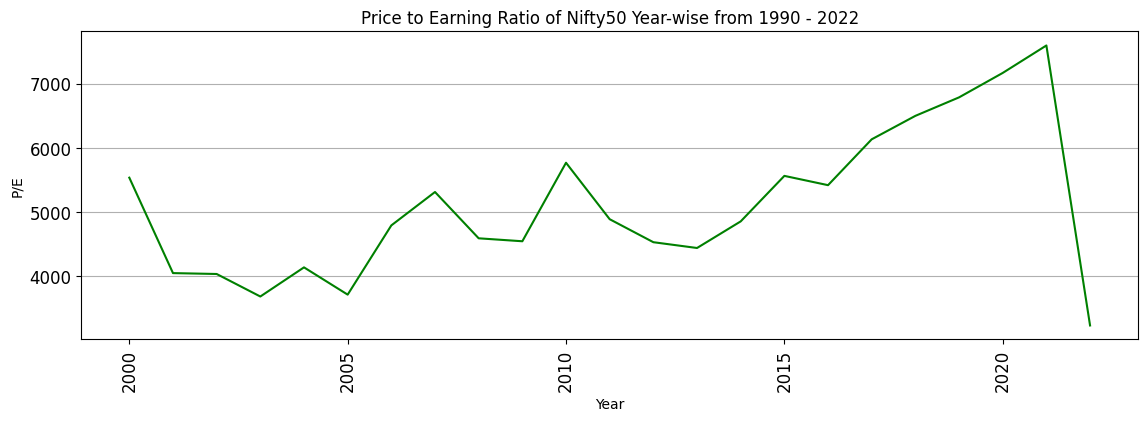

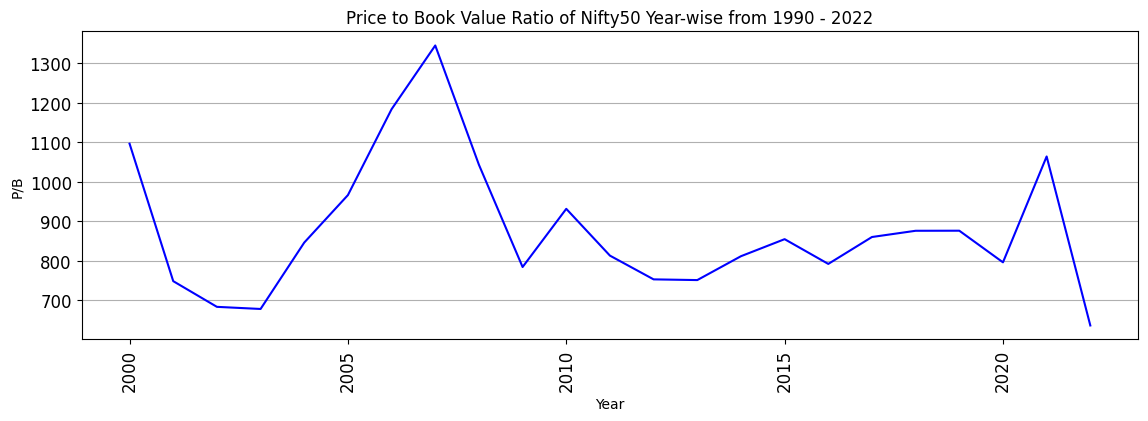

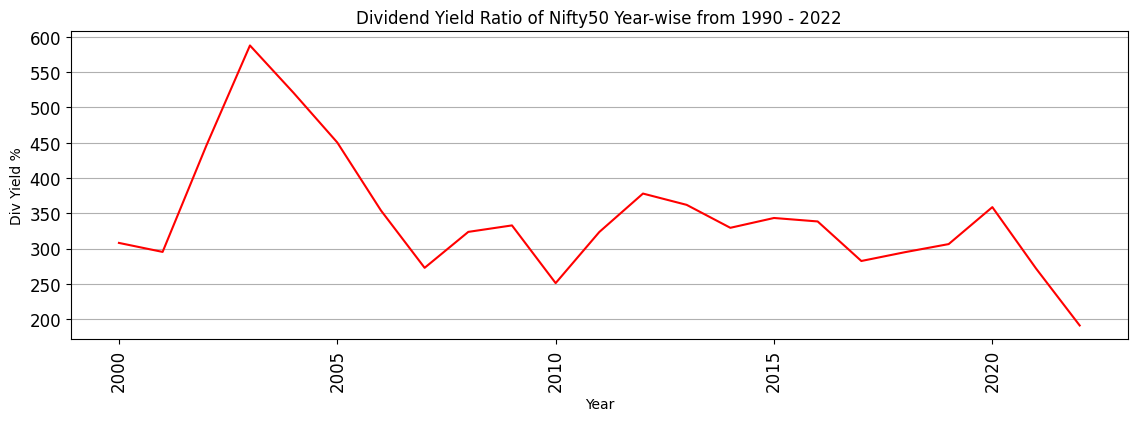

In [41]:
# Visualzing Price to Earning Ratio of Nifty50 grouped year-wise
check = Data2.groupby('Year')['P/E'].sum()
plt.figure(figsize = (30, 4))
ax1 = plt.subplot(121)
check.plot(y = "P/E", legend = False, fontsize = 12, sharex = False, title = "Price to Earning Ratio of Nifty50 Year-wise from 1990 - 2022", rot = 90, color = "green")
ax1.ticklabel_format(useOffset = False, style = 'plain')
ax1.set_ylabel("P/E")
ax1.yaxis.grid(True)
# Visualzing Price to Book Value of Nifty50 grouped year-wise
check = Data2.groupby('Year')['P/B'].sum()
plt.figure(figsize = (30, 4))
ax1 = plt.subplot(121)
check.plot(y = "P/B", legend = False, fontsize = 12, sharex = False, title = "Price to Book Value Ratio of Nifty50 Year-wise from 1990 - 2022", rot = 90, color = "blue")
ax1.ticklabel_format(useOffset = False, style = 'plain')
ax1.set_ylabel("P/B")
ax1.yaxis.grid(True)
# Visualzing Dividend Yield of Nifty50 grouped year-wise
check = Data2.groupby('Year')['Div Yield %'].sum()
plt.figure(figsize = (30, 4))
ax1 = plt.subplot(121)
check.plot(y = "Div Yield %", legend = False, fontsize = 12, sharex = False, title = "Dividend Yield Ratio of Nifty50 Year-wise from 1990 - 2022", rot = 90, color = "red")
ax1.ticklabel_format(useOffset = False, style = 'plain')
ax1.set_ylabel("Div Yield %")
ax1.yaxis.grid(True)

In [42]:
Data2.columns

Index(['index', 'Date', 'Open', 'High', 'Low', 'Close', 'Year', 'Month',
       'WeekDay', 'P/E', 'P/B', 'Div Yield %'],
      dtype='object')

In [43]:
column_list = ['Open', 'High', 'Low', 'Close', 'Year', 'Month', 'WeekDay','P/E', 'P/B', 'Div Yield %']

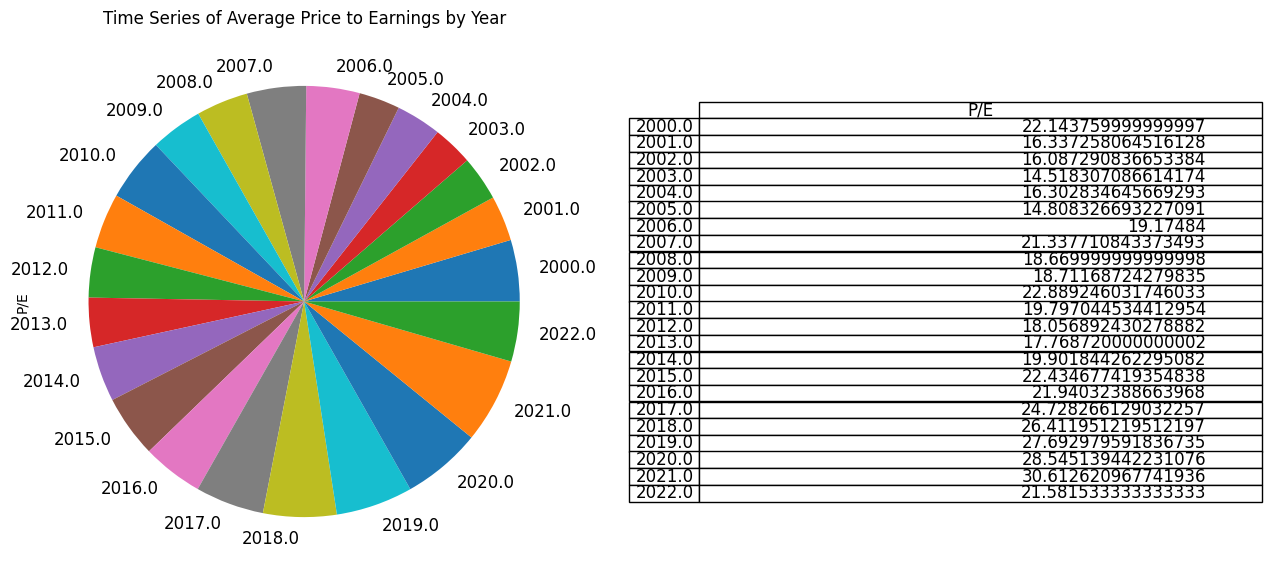

In [44]:
# Analyse based on Year how much Price to Earnings is generated.
for i, col_list in enumerate(column_list[0:8]):
    var = Data2.groupby('Year')[col_list].mean()

# Convert the variable into a pandas dataframe
var = pd.DataFrame(var)

# Plot to understand the trend
plt.figure(figsize = (16, 7))
ax1 = plt.subplot(121)
var.plot(kind = "pie", y = "P/E", legend = False, fontsize = 12, sharex = False,
         title = "Time Series of Average Price to Earnings by Year", ax = ax1)
#Plot the table to identify numbers
ax2 = plt.subplot(122)
plt.axis('off') # Since we are plotting the table
tbl = table(ax2, var, loc = 'center')
tbl.auto_set_font_size(False)
tbl.set_fontsize(12)
plt.show()

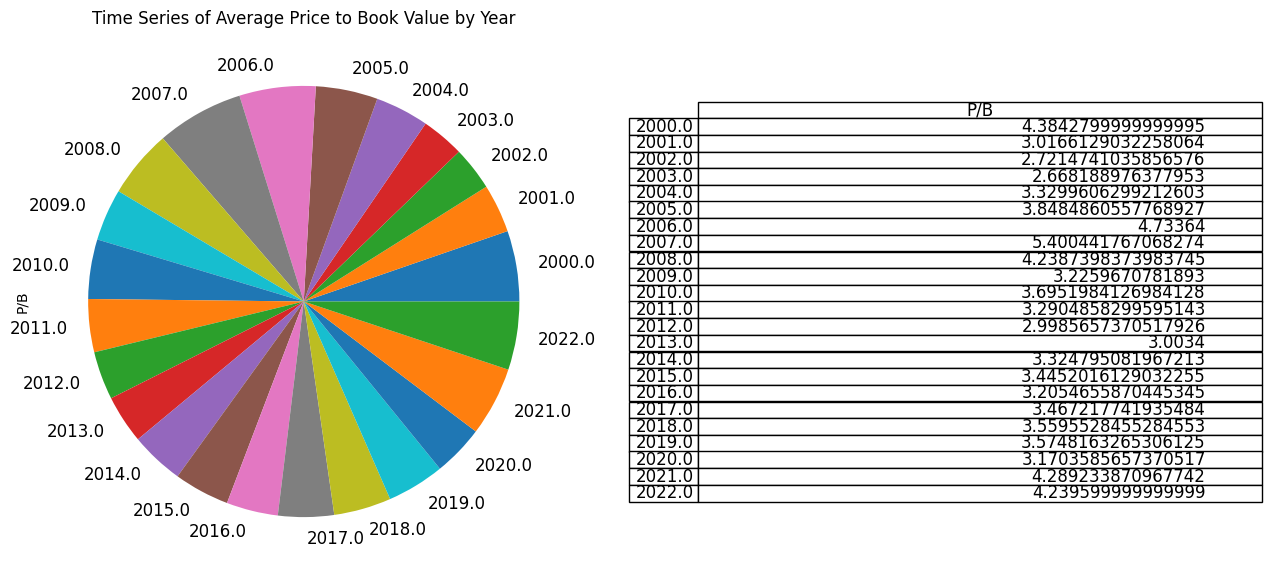

In [45]:
# Analyse based on Year how much Price to Earnings is generated.
for i, col_list in enumerate(column_list[0:9]):
    var = Data2.groupby('Year')[col_list].mean()

# Convert the variable into a pandas dataframe
var = pd.DataFrame(var)

# Plot to understand the trend
plt.figure(figsize = (16, 7))
ax1 = plt.subplot(121)
var.plot(kind = "pie", y = "P/B", legend = False, fontsize = 12, sharex = False,
         title = "Time Series of Average Price to Book Value by Year", ax = ax1)
# Plot the table to identify numbers
ax2 = plt.subplot(122)
plt.axis('off') # Since we are plotting the table
tbl = table(ax2, var, loc = 'center')
tbl.auto_set_font_size(False)
tbl.set_fontsize(12)
plt.show()

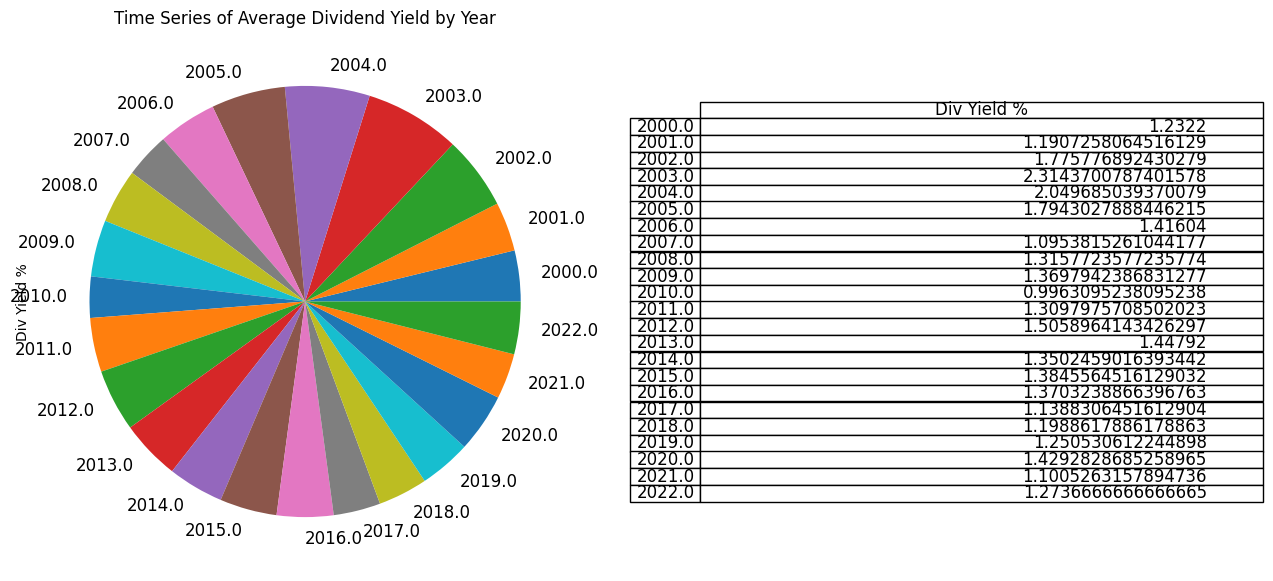

In [46]:
# Analyse based on Year how much Average Dividend Yield is generated.
for i, col_list in enumerate(column_list):
    var = Data2.groupby('Year')[col_list].mean()

# Convert the variable into a pandas dataframe
var = pd.DataFrame(var)

# Plot to understand the trend
plt.figure(figsize = (16, 7))
ax1 = plt.subplot(121)
var.plot(kind = "pie", y = "Div Yield %", legend = False, fontsize = 12, sharex = False,
         title = "Time Series of Average Dividend Yield by Year", ax = ax1)
# Plot the table to identify numbers
ax2 = plt.subplot(122)
plt.axis('off') # Since we are plotting the table
tbl = table(ax2, var, loc = 'center')
tbl.auto_set_font_size(False)
tbl.set_fontsize(12)
plt.show()